# CS464 Introduction to Machine Learning Homework 2 Question 2 - Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#find linear regression coefficients using the multivariate linear regression loss solution
def linRegCoef(x,y):
    cov = np.matmul(x.T,x)
    cov_inv = np.linalg.inv(cov)
    beta = np.matmul(np.matmul(cov_inv,x.T),y)
    return beta

In [3]:
#prediction
def predict(x,w):
    return np.matmul(x, w)

In [4]:
#mean squared error for given prediction and label vector
def mse(pr, y):
    return np.matmul((y-pr).T,(y-pr))/pr.shape[0]

In [5]:
#import data
x_train = pd.read_csv('question-2-train-features.csv', header=None, sep=',', names=["month","hr",
                                                                                    "weekday","weathersit",
                                                                                    "temp","atemp","hum",
                                                                                    "windspeed"])
y_train = pd.read_csv('question-2-train-labels.csv', header=None, sep=',', names=["bikes"])
x_test = pd.read_csv('question-2-test-features.csv', header=None, sep=',', names=["month","hr",
                                                                                    "weekday","weathersit",
                                                                                    "temp","atemp","hum",
                                                                                    "windspeed"])
y_test = pd.read_csv('question-2-test-labels.csv', header=None, names=["bikes"])

x_test.insert(loc=0, column='pseudo', value=np.ones(x_test.shape[0]))
x_train.insert(loc=0, column='pseudo', value=np.ones(x_train.shape[0]))

x_train_arr = np.asarray(x_train)
y_train_arr = np.asarray(y_train)
x_test_arr = np.asarray(x_test)
y_test_arr = np.asarray(y_test)
print(x_train.head(5))
print(y_train.head(5))
print(x_train.shape)
print(x_test.head(5))
print(y_test.head(5))
print(x_test.shape)

   pseudo  month   hr  weekday  weathersit  temp   atemp   hum  windspeed
0     1.0    1.0  1.0      6.0         1.0  0.22  0.2727  0.80     0.0000
1     1.0    1.0  2.0      6.0         1.0  0.22  0.2727  0.80     0.0000
2     1.0    1.0  3.0      6.0         1.0  0.24  0.2879  0.75     0.0000
3     1.0    1.0  4.0      6.0         1.0  0.24  0.2879  0.75     0.0000
4     1.0    1.0  5.0      6.0         2.0  0.24  0.2576  0.75     0.0896
   bikes
0   40.0
1   32.0
2   13.0
3    1.0
4    1.0
(14000, 9)
   pseudo  month    hr  weekday  weathersit  temp   atemp   hum  windspeed
0     1.0    8.0  14.0      6.0         1.0  0.80  0.7424  0.49     0.2985
1     1.0    8.0  15.0      6.0         1.0  0.80  0.7273  0.46     0.2836
2     1.0    8.0  16.0      6.0         1.0  0.80  0.7273  0.46     0.2985
3     1.0    8.0  17.0      6.0         3.0  0.74  0.6970  0.66     0.3582
4     1.0    8.0  18.0      6.0         2.0  0.70  0.6667  0.74     0.2985
   bikes
0  538.0
1  562.0
2  531.0
3  51

# Quesiton 2.2
## Data Rank

In [6]:
print(np.linalg.matrix_rank(np.matmul(x_train_arr.T,x_train_arr)))
# it tells me the matrix is full rank (rxc matric where r>c, col rank = 8 = # of columns)

9


# Question 2.3
## Linear Regression on the Whole Dataset

In [7]:
#calculate weights
weights = linRegCoef(x_train_arr,y_train_arr)
print(weights.shape)
print(weights)

(9, 1)
[[  35.52032936]
 [  -0.47656134]
 [   7.00054171]
 [   1.37221717]
 [  -4.24724733]
 [  68.4775968 ]
 [ 286.19995694]
 [-180.5873212 ]
 [  24.55935004]]


In [8]:
#training error
tr_pred = predict(x_train_arr,weights)
tr_pred_error = mse(tr_pred,y_train_arr).reshape(1)
print("Prediction Error: " + str(tr_pred_error[0]))

Prediction Error: 18204.227976890255


In [9]:
#test error
test_pred = predict(x_test_arr,weights)
test_pred_error = mse(test_pred,y_test_arr).reshape(1)
print("Test Error: " + str(test_pred_error[0]))

Test Error: 40379.06782240237


# Question 2.4
## Plot Predicted Number of Bikes vs Humidity

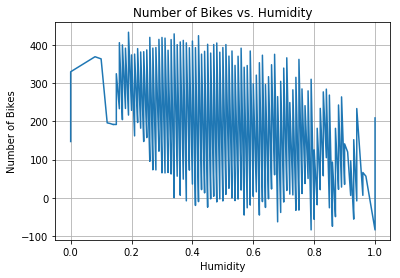

In [10]:
#concatenate test & training
trtest_hum = pd.concat([x_train.iloc[:,[7]],x_test.iloc[:,[7]]],axis=0)
trtest_hum_arr = np.asarray(trtest_hum)
trtest_bikes = pd.concat([pd.DataFrame(tr_pred), pd.DataFrame(test_pred)],axis=0)
trtest_bikes_arr = np.asarray(trtest_bikes)
xsorted, ysorted = zip(*sorted(zip(trtest_hum_arr, trtest_bikes_arr)))
plt.plot(xsorted,ysorted)
plt.ylabel("Number of Bikes")
plt.xlabel("Humidity")
plt.title("Number of Bikes vs. Humidity")
plt.grid()
plt.show()


## Plot the Number of Bikes vs Humidity

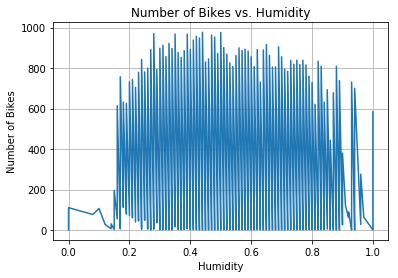

In [11]:
trtest_hum = pd.concat([x_train.iloc[:,[7]],x_test.iloc[:,[7]]],axis=0)
trtest_hum_arr = np.asarray(trtest_hum)
trtest_bikes = pd.concat([y_train, y_test],axis=0)
trtest_bikes_arr = np.asarray(trtest_bikes)
xsorted, ysorted = zip(*sorted(zip(trtest_hum_arr, trtest_bikes_arr)))
plt.plot(xsorted,ysorted)
plt.ylabel("Number of Bikes")
plt.xlabel("Humidity")
plt.title("Number of Bikes vs. Humidity")
plt.grid()
plt.show()

# Question 2.5
## Linear Regression using only Normalized Humidity

In [12]:
x_tr_hum = x_train.iloc[:,[0,7]]
x_test_hum = x_test.iloc[:,[0,7]]

print(x_tr_hum.head(5))
print(y_train.head(5))
print(x_test_hum.head(5))
print(y_test.head(5))

x_tr_hum_arr = np.asarray(x_tr_hum)
x_test_hum_arr = np.asarray(x_test_hum)

   pseudo   hum
0     1.0  0.80
1     1.0  0.80
2     1.0  0.75
3     1.0  0.75
4     1.0  0.75
   bikes
0   40.0
1   32.0
2   13.0
3    1.0
4    1.0
   pseudo   hum
0     1.0  0.49
1     1.0  0.46
2     1.0  0.46
3     1.0  0.66
4     1.0  0.74
   bikes
0  538.0
1  562.0
2  531.0
3  512.0
4  300.0


In [13]:
#calculate weights
hum_weights = linRegCoef(np.concatenate([x_tr_hum_arr, x_test_hum_arr],axis=0),np.concatenate([y_train_arr,y_test_arr],axis=0))
print(hum_weights.shape)
print(hum_weights)

(2, 1)
[[ 379.8707856 ]
 [-303.55891962]]


In [14]:
#training error
tr_pred_hum = predict(x_tr_hum_arr,hum_weights)
tr_pred_error_hum = mse(tr_pred_hum,y_train_arr).reshape(1)
print("Prediction Error: " + str(tr_pred_error_hum[0]))

Prediction Error: 25390.767637362158


In [15]:
#test error
test_pred_hum = predict(x_test_hum_arr,hum_weights)
test_pred_error = mse(test_pred_hum,y_test_arr).reshape(1)
print("Test Error: " + str(test_pred_error[0]))

Test Error: 46376.131878162836


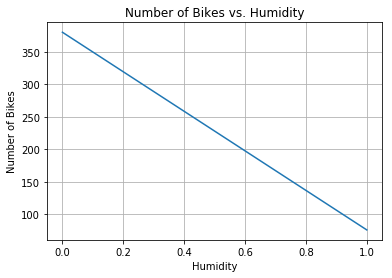

In [16]:
trtest_bikes_hum = pd.concat([pd.DataFrame(tr_pred_hum), pd.DataFrame(test_pred_hum)],axis=0)
trtest_bikes_arr_hum = np.asarray(trtest_bikes_hum)
xsorted, ysorted = zip(*sorted(zip(trtest_hum_arr,trtest_bikes_arr_hum)))
plt.plot(xsorted,ysorted)
plt.ylabel("Number of Bikes")
plt.xlabel("Humidity")
plt.title("Number of Bikes vs. Humidity")
plt.grid()
plt.show()